<h1 align="center">Fase 1 - Data Analysis and Exploration</h1>

## Módulo 01 - Visualização de Dados

### Aula 1 - Tratamento, exploração e visualização de dados    	   


#### 1. Para realizar a análise dos dados, as seguintes bibliotecas foram utilizadas:

* **os**: para manipulação de arquivos.
* **sys**: para manipulação de arquivos.
* **Pandas**: para manipulação e análise dos dados.
* **Numpy**: para manipulação de arrays e matrizes.
* **Matplotlib**: para visualização dos dados.
* **Seaborn**: para visualização dos dados.

In [3]:
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import numpy as np

# Limpar entradas duplicadas no PATH
sys.path = list(set(sys.path))

# Adicionando o caminho da pasta onde o arquivo visualization.py está localizado
sys.path.append('/home/naina/Projects/pos_fiap/scripts/utils')

# Agora você pode importar o arquivo corretamente
from visualization import *



#### 2. Aquisição dos dados
Esses dados foram obtidos a partir do IBGE, e estão disponíveis no site: https://www.ibge.gov.br/estatisticas/sociais/populacao/9103-estimativas-de-populacao.html?=&t=resultados . São dados referentes à estimativa populacional de 2024, e estão disponíveis em formato xlsx.

In [4]:
# Carregando o arquivo de dados
ibge = pd.read_excel('/home/naina/Projects/pos_fiap/fase_01/data/raw/estimativa_dou_2024.xls')
ibge.head()

,ESTIMATIVAS DA POPULAÇÃO RESIDENTE NO BRASIL E UNIDADES DA FEDERAÇÃO COM DATA DE REFERÊNCIA EM 1º DE JULHO DE 2024,Unnamed: 1
0,BRASIL E UNIDADES DA FEDERAÇÃO,POPULAÇÃO ESTIMADA
1,Brasil,212583750
2,Norte,18669345
3,Rondônia,1746227
4,Acre,880631


##### 2.1 Ajuste da Apresentação dos Dados

In [5]:
#Removendo a linha, 0, 34 e 35
ibge = ibge.drop([0, 34, 35])



#### 3. Análise Exploratória dos Dados

##### 3.1. Entendendo dos Dados
Para iniciar a análise, é importante entender a estrutura dos dados e as informações disponíveis.
##### **Dicionário de Dados**
Um dicionário de dados foi criado para facilitar a compreensão das informações contidas no dataset. As colunas presentes no dataset são:
* **BR_UF2004**: Brasil, Região Norte, Região Nordeste, Região Sudeste, Região Sul, Região Centro-Oeste e Unidade da Federação.
* **População**: População estimada em Julho de 2024.

In [6]:
ibge.columns = ['BR_UF2004', 'POP_ESTIMADA']
ibge

,BR_UF2004,POP_ESTIMADA
1,Brasil,212583750
2,Norte,18669345
3,Rondônia,1746227
4,Acre,880631
5,Amazonas,4281209
6,Roraima,716793
7,Pará,8664306
8,Amapá,802837
9,Tocantins,1577342
10,Nordeste,57112096


##### 3.2. Verificação dos Dados
Nesta etapa, foi realizada uma inspeção minuciosa do dataset para assegurar sua integridade e qualidade antes de prosseguir com a análise. A verificação dos dados inclui:

- **Exploração Inicial:** Leitura do dataset para entender a estrutura dos dados, as variáveis disponíveis e o volume de registros.
- **Validação de Consistência:** Verificação de inconsistências, como valores ausentes, duplicações e anomalias que possam impactar a análise.
- **Sumarização Estatística:** Geração de estatísticas descritivas das variáveis para obter uma visão geral das distribuições e identificar possíveis outliers.

In [7]:
ibge.info()


<class 'pandas.core.frame.DataFrame'>
Index: 33 entries, 1 to 33
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   BR_UF2004     33 non-null     object
 1   POP_ESTIMADA  33 non-null     object
dtypes: object(2)
memory usage: 792.0+ bytes


In [8]:
# Verificando se tem valores duplicados
ibge.duplicated().sum()

np.int64(0)

In [9]:
#convertendo a coluna POP_ESTIMADA para int e garantindo que a coluna BR_UF2004 seja string
ibge['POP_ESTIMADA'] = ibge['POP_ESTIMADA'].astype(int)
ibge['BR_UF2004'] = ibge['BR_UF2004'].astype(str)
ibge

,BR_UF2004,POP_ESTIMADA
1,Brasil,212583750
2,Norte,18669345
3,Rondônia,1746227
4,Acre,880631
5,Amazonas,4281209
6,Roraima,716793
7,Pará,8664306
8,Amapá,802837
9,Tocantins,1577342
10,Nordeste,57112096


In [10]:
ibge.info() 


<class 'pandas.core.frame.DataFrame'>
Index: 33 entries, 1 to 33
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   BR_UF2004     33 non-null     object
 1   POP_ESTIMADA  33 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 792.0+ bytes


##### **Criando cópia do DataFrame após tratamento dos dados**
- **Descrição:** Após a conclusão do tratamento dos dados, foi criada uma cópia do DataFrame contendo as alterações realizadas. Essa cópia servirá como base para a análise exploratória e visualização dos dados, garantindo que as transformações sejam refletidas nas etapas subsequentes.

In [11]:
ibge_copy = ibge.copy()

##### **Observação:** 
Convertendo a copia do DataFrame para um arquivo CSV, para facilitar a manipulação dos dados.

In [12]:
ibge_copy.to_csv('/home/naina/Projects/pos_fiap/fase_01/data/processed/ibge_estimativa_2024.csv', index=False)

In [13]:
ibge_copy = pd.read_csv('/home/naina/Projects/pos_fiap/fase_01/data/processed/ibge_estimativa_2024.csv')
ibge_copy

,BR_UF2004,POP_ESTIMADA
0,Brasil,212583750
1,Norte,18669345
2,Rondônia,1746227
3,Acre,880631
4,Amazonas,4281209
5,Roraima,716793
6,Pará,8664306
7,Amapá,802837
8,Tocantins,1577342
9,Nordeste,57112096


In [14]:
#A titulo dessa analise vamos considerar a tabela apenas com os estados
ibge_copy = ibge_copy.drop([0, 1, 9, 19, 24, 28])
ibge_copy.reset_index(drop=True, inplace=True)
ibge_copy


,BR_UF2004,POP_ESTIMADA
0,Rondônia,1746227
1,Acre,880631
2,Amazonas,4281209
3,Roraima,716793
4,Pará,8664306
5,Amapá,802837
6,Tocantins,1577342
7,Maranhão,7010960
8,Piauí,3375646
9,Ceará,9233656


In [15]:
# Renoemando a coluna BR_UF2004 para 'uf' e POP_ESTIMADA para 'populacao' 
ibge_copy.columns = ['uf', 'populacao']
# setando a coluna uf como index
ibge_copy.set_index('uf', inplace=True)
ibge_copy

,populacao
uf,
Rondônia,1746227
Acre,880631
Amazonas,4281209
Roraima,716793
Pará,8664306
Amapá,802837
Tocantins,1577342
Maranhão,7010960
Piauí,3375646


##### **Observação:** 
As colunas do dataset foram renomeadas para facilitar a manipulação dos dados e padrão de nomenclatura do python. Alem disso foram setados os index para o nome dos estados para que seja mais facil a manipulação e comparação dos dados com o dataset dos dados dos gastor por estado.

* Carregando o dataset dos gastos por estado, para que seja possivel a comparação dos dados de população com os dados de gastos.

In [28]:
spending_states = pd.read_csv('/home/naina/Projects/pos_fiap/fase_01/data/processed/Datacleaned2008to2024.csv', thousands=',', decimal='.', engine='python', encoding='utf-8')
spending_states.head()

,Unidade da Federação,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,...,2023/Out,2023/Nov,2023/Dez,2024/Jan,2024/Fev,2024/Mar,2024/Abr,2024/Mai,2024/Jun,Região
0,São Paulo,"173.597.042,74","170.903.108,82","170.623.851,29","172.764.762,94","175.887.493,92","179.821.352,27","180.567.746,84","180.503.167,36","192.745.719,34",...,"385.374.458,64","372.199.641,41","363.664.832,51","397.238.888,73","380.600.275,32","405.238.898,93","405.415.546,71","357.246.934,02","201.122.009,15",Sudeste
1,Minas Gerais,"70.301.089,50","79.119.005,51","79.046.322,41","79.268.070,12","79.632.111,54","82.225.138,22","80.374.117,08","82.442.262,90","88.613.476,60",...,"225.270.555,83","216.383.028,31","209.148.368,56","222.300.157,90","209.800.599,55","228.100.016,47","216.082.730,78","178.930.809,27","89.499.683,35",Sudeste
2,Paraná,"48.855.046,46","55.611.791,07","56.115.135,82","55.574.831,93","56.094.754,74","59.802.402,07","56.699.001,13","58.091.985,79","61.365.941,22",...,"156.810.366,15","157.208.263,16","147.082.193,94","160.622.546,08","156.350.201,45","167.688.877,25","154.184.685,67","127.199.121,21","65.476.078,99",Sul
3,Rio Grande do Sul,"45.897.704,82","52.928.695,92","51.972.416,77","51.679.350,79","53.759.674,01","56.391.647,77","56.233.758,74","57.910.170,98","59.592.124,91",...,"119.824.136,65","116.462.635,01","111.635.041,84","120.372.550,76","110.113.378,72","120.372.124,21","114.128.856,86","77.476.354,15","35.718.466,55",Sul
4,Rio de Janeiro,"44.128.159,73","42.933.765,97","45.324.789,60","43.951.349,46","44.143.987,63","44.360.299,24","42.502.172,22","43.066.461,47","44.553.314,55",...,"132.952.839,20","125.403.561,99","119.919.274,06","125.351.624,45","112.879.820,43","123.235.922,60","113.767.297,88","96.747.362,37","45.599.827,60",Sudeste


In [29]:
# renomeando a coluna 'Unidade da Federação' para 'uf'
spending_states.rename(columns={'Unidade da Federação': 'uf'}, inplace=True)

* Selecionando os dados de gastos no ano mais recente, para que seja possivel a comparação dos dados de população com os dados de gastos. No caso da aula, a proposição foi de comparar os dados de população com os dados de gastos no ano mais recente, o que no nosso caso era 2024.

In [30]:
spending_states = spending_states.set_index('uf')
spending_states24 = spending_states[['2024/Jan', '2024/Fev', '2024/Mar', '2024/Abr', '2024/Mai', '2024/Jun']]
spending_states24.head()


,2024/Jan,2024/Fev,2024/Mar,2024/Abr,2024/Mai,2024/Jun
uf,,,,,,
São Paulo,"397.238.888,73","380.600.275,32","405.238.898,93","405.415.546,71","357.246.934,02","201.122.009,15"
Minas Gerais,"222.300.157,90","209.800.599,55","228.100.016,47","216.082.730,78","178.930.809,27","89.499.683,35"
Paraná,"160.622.546,08","156.350.201,45","167.688.877,25","154.184.685,67","127.199.121,21","65.476.078,99"
Rio Grande do Sul,"120.372.550,76","110.113.378,72","120.372.124,21","114.128.856,86","77.476.354,15","35.718.466,55"
Rio de Janeiro,"125.351.624,45","112.879.820,43","123.235.922,60","113.767.297,88","96.747.362,37","45.599.827,60"


In [31]:
#somando os gastos de cada estado
spending_states24['total'] = spending_states24.sum(axis=1)
spending_states24.sort_values('total', ascending=False, inplace=True)
spending_states24.head()

/tmp/ipykernel_4730/4257823397.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spending_states24['total'] = spending_states24.sum(axis=1)
/tmp/ipykernel_4730/4257823397.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spending_states24.sort_values('total', ascending=False, inplace=True)


,2024/Jan,2024/Fev,2024/Mar,2024/Abr,2024/Mai,2024/Jun,total
uf,,,,,,,
São Paulo,"397.238.888,73","380.600.275,32","405.238.898,93","405.415.546,71","357.246.934,02","201.122.009,15","2.146.862.552,86"
Minas Gerais,"222.300.157,90","209.800.599,55","228.100.016,47","216.082.730,78","178.930.809,27","89.499.683,35","1.144.713.997,32"
Paraná,"160.622.546,08","156.350.201,45","167.688.877,25","154.184.685,67","127.199.121,21","65.476.078,99","831.521.510,65"
Rio de Janeiro,"125.351.624,45","112.879.820,43","123.235.922,60","113.767.297,88","96.747.362,37","45.599.827,60","617.581.855,33"
Santa Catarina,"108.845.317,14","111.565.393,23","116.528.753,76","115.840.578,79","91.637.957,49","43.606.872,72","588.024.873,13"


In [33]:
pd.options.display.float_format = lambda x: f'{x:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.')
spending_states24.head()

,2024/Jan,2024/Fev,2024/Mar,2024/Abr,2024/Mai,2024/Jun,total
uf,,,,,,,
São Paulo,"397.238.888,73","380.600.275,32","405.238.898,93","405.415.546,71","357.246.934,02","201.122.009,15","2.146.862.552,86"
Minas Gerais,"222.300.157,90","209.800.599,55","228.100.016,47","216.082.730,78","178.930.809,27","89.499.683,35","1.144.713.997,32"
Paraná,"160.622.546,08","156.350.201,45","167.688.877,25","154.184.685,67","127.199.121,21","65.476.078,99","831.521.510,65"
Rio de Janeiro,"125.351.624,45","112.879.820,43","123.235.922,60","113.767.297,88","96.747.362,37","45.599.827,60","617.581.855,33"
Santa Catarina,"108.845.317,14","111.565.393,23","116.528.753,76","115.840.578,79","91.637.957,49","43.606.872,72","588.024.873,13"


In [34]:
spending_24 = spending_states24[['total']]
spending_24.head()

,total
uf,
São Paulo,"2.146.862.552,86"
Minas Gerais,"1.144.713.997,32"
Paraná,"831.521.510,65"
Rio de Janeiro,"617.581.855,33"
Santa Catarina,"588.024.873,13"


* Realizando a junção dos dados de população com os dados de gastos, para que possa ser calculado o gasto per capita.

In [35]:
#criando o df de gastos e populacao relativos a 2024 realizando um join
spending_pop_24 = spending_24.join(ibge_copy)
spending_pop_24.head()

,total,populacao
uf,,
São Paulo,"2.146.862.552,86",45973194
Minas Gerais,"1.144.713.997,32",21322691
Paraná,"831.521.510,65",11824665
Rio de Janeiro,"617.581.855,33",17219679
Santa Catarina,"588.024.873,13",8058441


#### Aula 2 - Visualização de Dados - Proporcionalidade e Seaborn

##### 2.1. Visualização de Dados com Matplotlib

* criando a coluna de gasto per capita, para que seja possivel a visualização dos dados de gasto per capita.

In [36]:
spending_pop_24['gasto_por_habitante'] = spending_pop_24['total'] / spending_pop_24['populacao']
spending_pop_24.head()

,total,populacao,gasto_por_habitante
uf,,,
São Paulo,"2.146.862.552,86",45973194,"46,70"
Minas Gerais,"1.144.713.997,32",21322691,"53,69"
Paraná,"831.521.510,65",11824665,"70,32"
Rio de Janeiro,"617.581.855,33",17219679,"35,86"
Santa Catarina,"588.024.873,13",8058441,"72,97"


<Axes: xlabel='uf'>

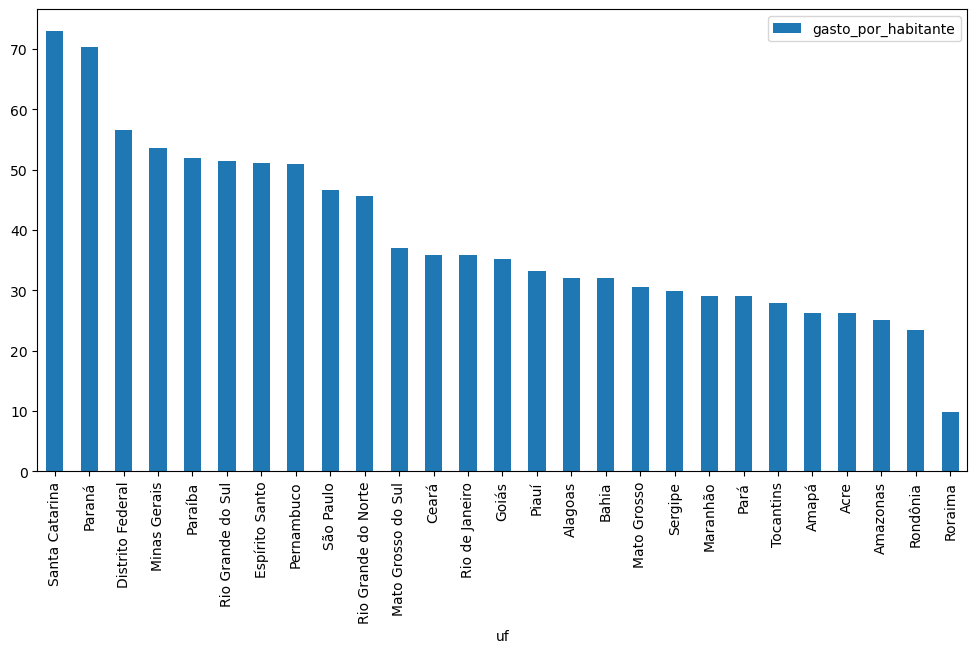

In [52]:
spending_pop_24.plot(kind='bar', y='gasto_por_habitante', figsize=(12, 6))

##### **Desafios:**

1. Desafio 01: Refinar o gráfico de barras, alterando a palete de cores, título, eixos e legendas.
2. Desafio 02: colocar uma linha horizontal na média dos gastos per capita.

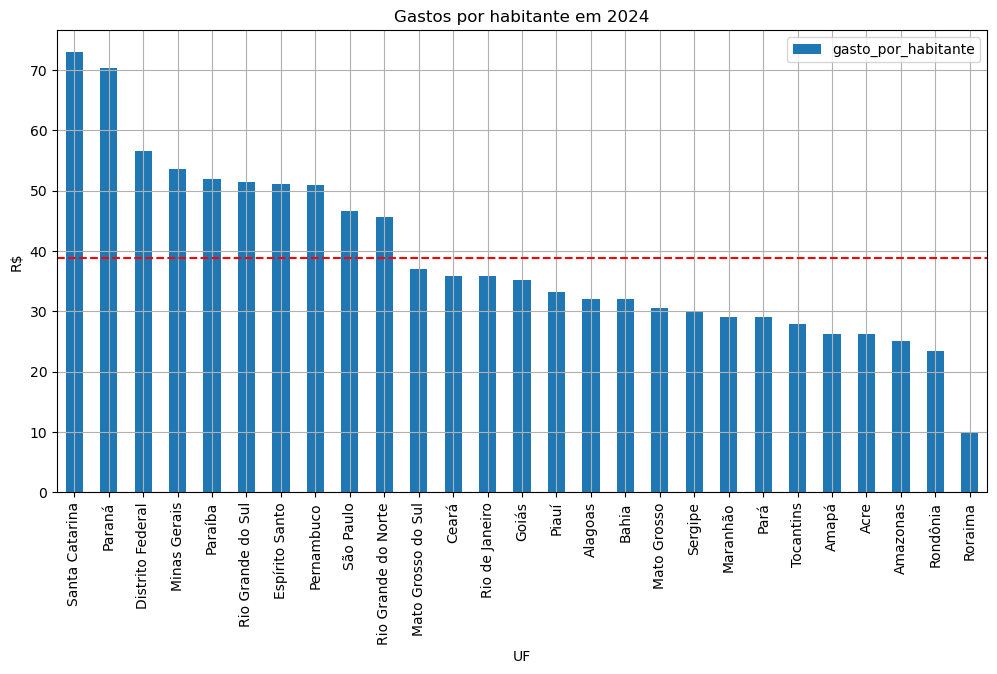

In [53]:
# Refinando o gráfico
spending_pop_24.plot(kind='bar', y='gasto_por_habitante', figsize=(12, 6))

plt.title('Gastos por habitante em 2024')
plt.ylabel('R$')
plt.xlabel('UF')
plt.grid()

#Colocando uma linha horizontal para representar a média de gastos por habitante
plt.axhline(spending_pop_24['gasto_por_habitante'].mean(), color='red', linestyle='--', label='Média')

#ordenando por gasto por habitante  
spending_pop_24 = spending_pop_24.sort_values('gasto_por_habitante', ascending=False)

plt.show()

3. Desafio 03: ordenando os estados por numero de habitantes e plotando o gráfico de gastos per capita.

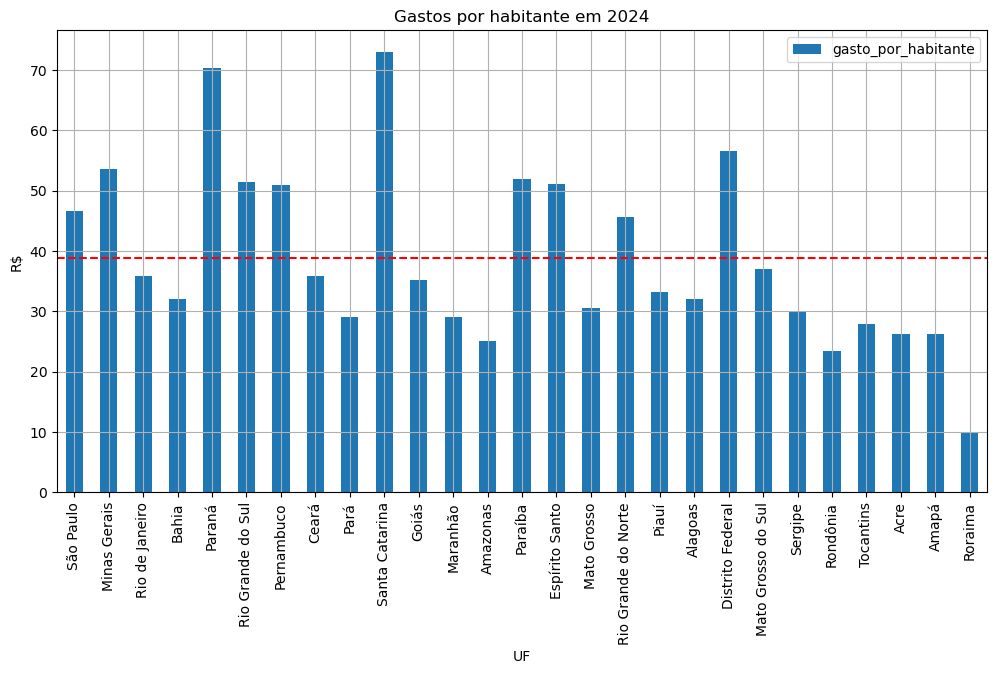

In [55]:
# odenando o grafico pelos estados por numero de habitantes
spending_pop_24.plot(kind='bar', y='gasto_por_habitante', figsize=(12, 6))

plt.title('Gastos por habitante em 2024')
plt.ylabel('R$')
plt.xlabel('UF')
plt.grid()

#Colocando uma linha horizontal para representar a média de gastos por habitante
plt.axhline(spending_pop_24['gasto_por_habitante'].mean(), color='red', linestyle='--', label='Média')

#ordenando numero de habitantes
spending_pop_24 = spending_pop_24.sort_values('populacao', ascending=False)

plt.show()


##### 2.2. Visualização de Dados com Seaborn

<Figure size 1200x1000 with 0 Axes>

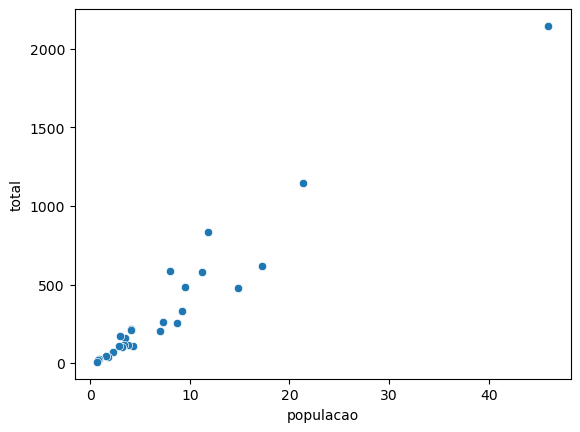

<Figure size 1200x1000 with 0 Axes>

In [67]:
#plotando o grafico de gastos por habitante em scatter
sns.scatterplot(data=spending_pop_24/1000000, x='populacao', y='total')
plt.figure(figsize=(12, 10))


<Figure size 1200x600 with 0 Axes>

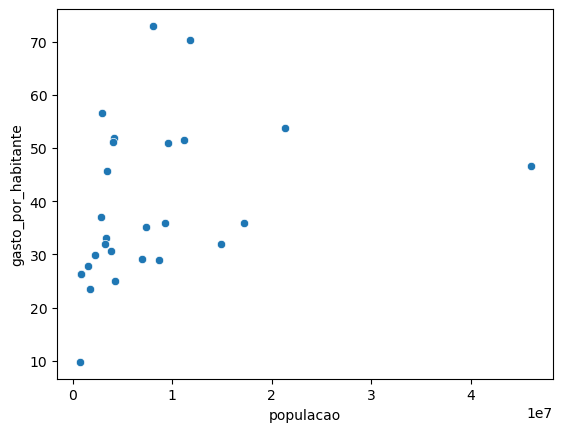

<Figure size 1200x600 with 0 Axes>

In [70]:
sns.scatterplot(data=spending_pop_24, x='populacao', y='gasto_por_habitante')
plt.figure(figsize=(12, 6))


##### **Desafios:**

1. Desafio 01: Refinar o gráfico de barras, alterando a palete de cores, título, eixos e legendas.
2. Desafio 02: plotar os dois graficos lado a lado, para que seja possivel a comparação dos dados.

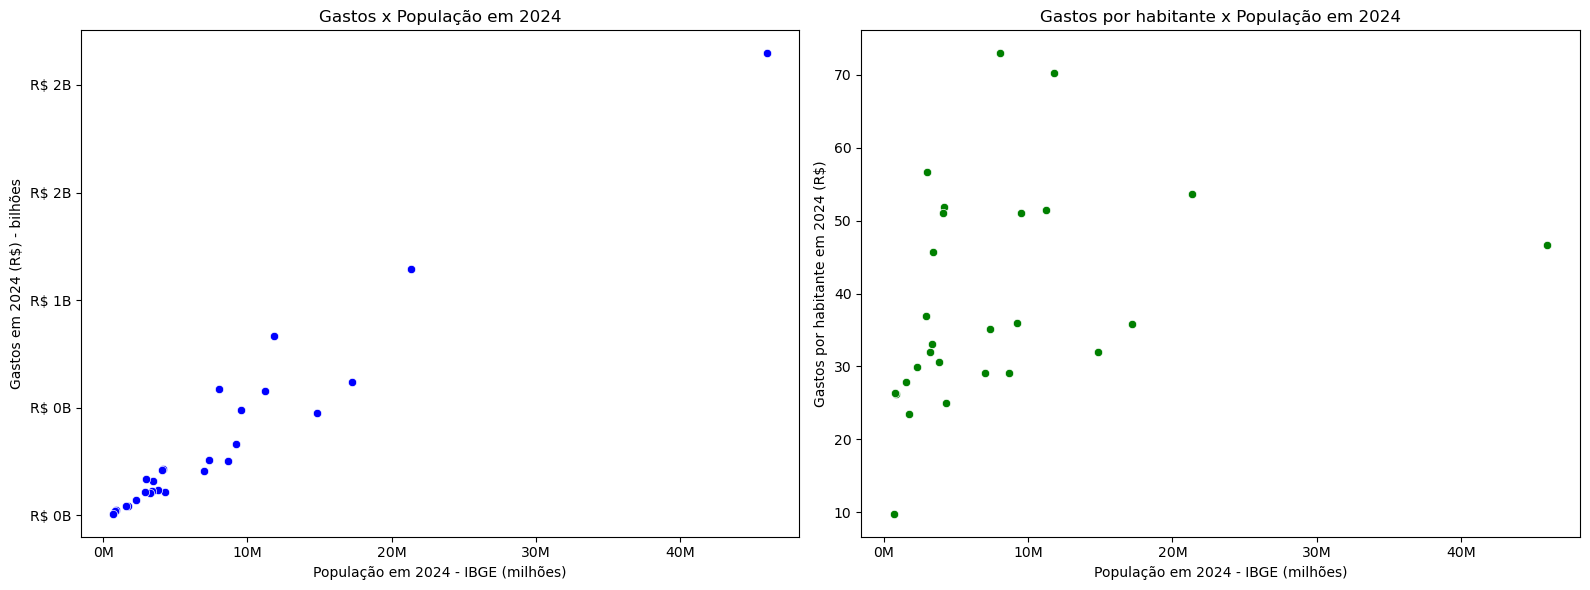

In [80]:
#plotando os dois graficos juntos
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

sns.scatterplot(data=spending_pop_24, x='populacao', y='total', ax=ax[0], color='blue')
ax[0].set_title('Gastos x População em 2024')
ax[0].set_xlabel('População em 2024 - IBGE (milhões)')
ax[0].set_ylabel('Gastos em 2024 (R$) - bilhões')
ax[0].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1000000:,.0f}M'))
#dividindo o eixo y por 1 bilhão
ax[0].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'R$ {x/1000000000:,.0f}B'))


sns.scatterplot(data=spending_pop_24, x='populacao', y='gasto_por_habitante', ax=ax[1], color='green')
ax[1].set_title('Gastos por habitante x População em 2024')
ax[1].set_xlabel('População em 2024 - IBGE (milhões)')
ax[1].set_ylabel('Gastos por habitante em 2024 (R$)')
ax[1].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1000000:,.0f}M'))

plt.tight_layout()
plt.show()

#### Aula 3 - Visualização de Dados - Ticks, Escalas e Formação de Imagens

##### 3.1. Explorando a Visualização de Dados com Seaborn

* Selecionando um Estado para visualização dos dados.

In [84]:
spending_states24.head()

,2024/Jan,2024/Fev,2024/Mar,2024/Abr,2024/Mai,2024/Jun,total
uf,,,,,,,
São Paulo,"397.238.888,73","380.600.275,32","405.238.898,93","405.415.546,71","357.246.934,02","201.122.009,15","2.146.862.552,86"
Minas Gerais,"222.300.157,90","209.800.599,55","228.100.016,47","216.082.730,78","178.930.809,27","89.499.683,35","1.144.713.997,32"
Paraná,"160.622.546,08","156.350.201,45","167.688.877,25","154.184.685,67","127.199.121,21","65.476.078,99","831.521.510,65"
Rio de Janeiro,"125.351.624,45","112.879.820,43","123.235.922,60","113.767.297,88","96.747.362,37","45.599.827,60","617.581.855,33"
Santa Catarina,"108.845.317,14","111.565.393,23","116.528.753,76","115.840.578,79","91.637.957,49","43.606.872,72","588.024.873,13"


In [90]:
#Retrira a coluna total
speding_month_24 = spending_states24.drop('total', axis=1)
speding_month_24.T.head()

uf,São Paulo,Minas Gerais,Paraná,Rio de Janeiro,Santa Catarina,Rio Grande do Sul,Pernambuco,Bahia,Ceará,Goiás,...,Piauí,Mato Grosso do Sul,Amazonas,Alagoas,Sergipe,Tocantins,Rondônia,Acre,Amapá,Roraima
2024/Jan,"397.238.888,73","222.300.157,90","160.622.546,08","125.351.624,45","108.845.317,14","120.372.550,76","87.154.661,78","101.309.815,12","68.104.664,24","49.939.313,00",...,"22.059.611,11","26.527.245,91","21.710.451,55","19.888.944,44","17.140.058,39","9.237.273,45","11.395.300,88","4.404.809,58","4.009.875,37","2.784.557,45"
2024/Fev,"380.600.275,32","209.800.599,55","156.350.201,45","112.879.820,43","111.565.393,23","110.113.378,72","81.983.296,27","91.419.828,81","63.811.880,19","46.611.854,37",...,"20.423.284,54","24.759.319,47","18.907.790,91","18.704.151,60","14.411.192,67","9.572.666,16","9.792.549,16","4.478.164,90","3.499.564,15","2.113.499,72"
2024/Mar,"405.238.898,93","228.100.016,47","167.688.877,25","123.235.922,60","116.528.753,76","120.372.124,21","88.256.016,78","97.196.666,40","65.031.493,74","53.782.625,22",...,"22.397.541,19","24.491.655,05","21.767.764,51","20.044.125,39","15.336.115,45","9.753.104,56","8.104.206,09","4.764.699,46","4.059.123,00","1.783.130,45"
2024/Abr,"405.415.546,71","216.082.730,78","154.184.685,67","113.767.297,88","115.840.578,79","114.128.856,86","92.833.652,07","84.744.298,49","64.193.695,76","47.946.449,59",...,"20.498.973,49","17.594.222,58","19.920.938,48","19.761.737,42","12.049.597,89","8.138.826,15","6.275.935,03","4.488.757,08","3.731.018,03","174.731,35"
2024/Mai,"357.246.934,02","178.930.809,27","127.199.121,21","96.747.362,37","91.637.957,49","77.476.354,15","88.546.267,22","66.032.184,30","47.716.409,58","40.085.222,73",...,"16.867.157,79","10.302.963,97","17.883.906,15","16.535.041,95","6.925.527,91","4.985.743,47","4.143.349,11","3.406.321,94","3.793.604,82","120.854,25"


<Figure size 1200x600 with 0 Axes>

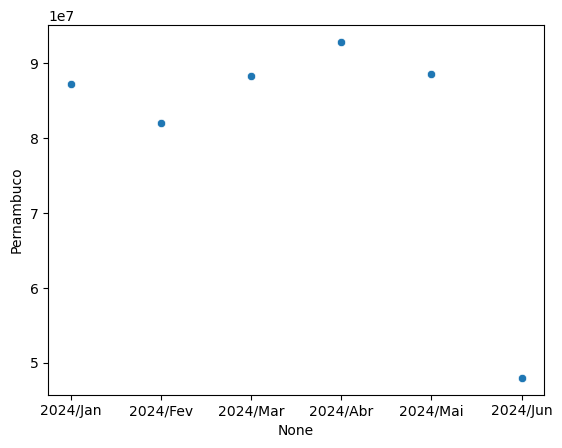

<Figure size 1200x600 with 0 Axes>

In [98]:
#plotando os gastos de Pernambuco em 2024
sns.scatterplot(data=speding_month_24.T, x = speding_month_24.columns, y = speding_month_24.T['Pernambuco'])
plt.figure(figsize=(12, 6))



##### **Desafios:**

1. Desafio 01: Refinar o gráfico de barras, alterando a palete de cores, título, eixos e legendas e plotar 02 estados juntos

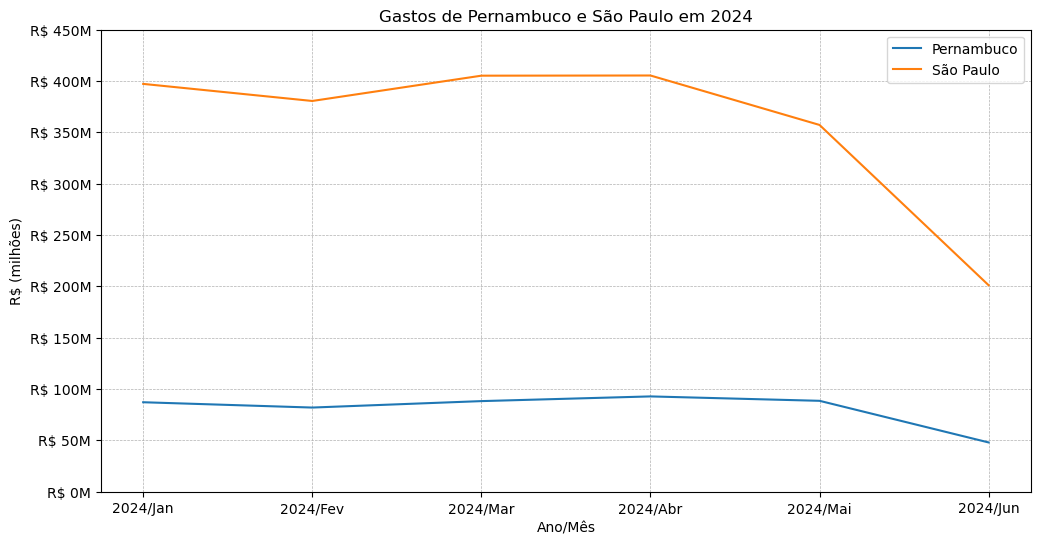

In [122]:
# plotando os gastos de Pernambuco e São Paulo em 2024 juntos
plt.figure(figsize=(12, 6))
sns.lineplot(data=speding_month_24.T, x = speding_month_24.columns, y = speding_month_24.T['Pernambuco']/1000000, label='Pernambuco')
sns.lineplot(data=speding_month_24.T, x = speding_month_24.columns, y = speding_month_24.T['São Paulo']/1000000, label='São Paulo')
plt.ylabel('R$ (milhões)')
plt.xlabel('Ano/Mês')
plt.title('Gastos de Pernambuco e São Paulo em 2024')
plt.legend(loc = 'upper right')
plt.grid(linestyle='--', linewidth=0.5)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.gca().xaxis.set_minor_locator(ticker.MultipleLocator(1))
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'R$ {x:,.0f}M'))
plt.ylim(0, 450)

plt.show()

* Observação: Foi realizado a plotagem de 02 estados juntos, para que seja possivel a comparação dos dados. O desafio propõe a plotagem em scaterplot, mas foi realizado em linha para facilitar a visualização dos dados no tempo. Ademais no decorrer da aula os ajustes são feitos em um grafico de linha mas não aparece a troca no video explicitamente.

#### Aula 4 - Trabalhando Datetime e Melt